In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, kstest, chi2_contingency
import seaborn as sns

In [ ]:
# 1. Simulating Data or Load Real Data
def simulate_data(n=100, scale=3):
    """Simulate inter-arrival times from an exponential distribution."""
    np.random.seed(42)  # Ensure reproducibility
    return np.random.exponential(scale=scale, size=n)

In [ ]:
# Use simulated data (scale = 1/λ, mean = 3 seconds) or load real data here
inter_arrival_times = simulate_data(n=200, scale=3)

In [ ]:

# 2. Exploratory Data Analysis (EDA)
def plot_histogram(data):
    """Plot histogram of inter-arrival times with exponential PDF overlay."""
    lambda_est = 1 / np.mean(data)  # Estimated rate parameter
    plt.figure(figsize=(10, 6))
    sns.histplot(data, bins=20, kde=False, stat="density", color='green', label="Observed Data", alpha=0.6)
    x = np.linspace(0, max(data), 100)
    plt.plot(x, expon.pdf(x, scale=1/lambda_est), 'r-', lw=2, label=f'Fitted Exponential (λ={lambda_est:.2f})')
    plt.title('Inter-Arrival Times with Exponential Fit')
    plt.xlabel('Inter-Arrival Time (seconds)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

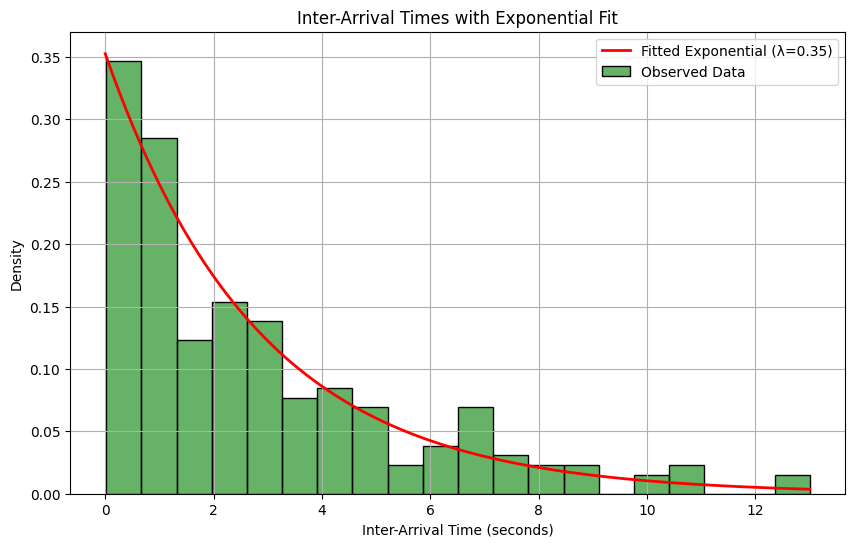

In [ ]:
# Run plot
plot_histogram(inter_arrival_times)

In [ ]:
# 3. Goodness of Fit: Statistical Tests
def perform_goodness_of_fit(data):
    """Perform Kolmogorov-Smirnov (KS) test for exponential distribution fit."""
    lambda_est = 1 / np.mean(data)
    ks_stat, p_value = kstest(data, 'expon', args=(0, 1/lambda_est))
    print(f"KS Statistic: {ks_stat:.4f}, P-value: {p_value:.4f}")
    if p_value > 0.05:
        print("The exponential distribution fits the data well (fail to reject H0).")
    else:
        print("The exponential distribution does not fit the data well (reject H0).")

In [ ]:
# Run goodness-of-fit test
perform_goodness_of_fit(inter_arrival_times)

KS Statistic: 0.0507, P-value: 0.6630
The exponential distribution fits the data well (fail to reject H0).


In [ ]:
# 4. Traffic Light Timing Optimization
def optimize_traffic_light(data):
    """Calculate optimal green light timing based on arrival rates."""
    lambda_est = 1 / np.mean(data)
    optimal_green_time = 1 / lambda_est
    print(f"Optimal Green Light Duration: {optimal_green_time:.2f} seconds per vehicle")
    print(f"Average vehicle arrival rate: {lambda_est:.2f} vehicles/second")
    return optimal_green_time

optimal_green_time = optimize_traffic_light(inter_arrival_times)

Optimal Green Light Duration: 2.84 seconds per vehicle
Average vehicle arrival rate: 0.35 vehicles/second


In [ ]:
# 5. Queue Build-Up Probability
def calculate_queue_probability(lambda_est, red_duration, queue_threshold=5):
    """
    Calculate the probability of more than `queue_threshold` vehicles
    arriving during a red light.
    """
    from scipy.special import gammaincc
    n = queue_threshold
    prob_queue = 1 - gammaincc(n, lambda_est * red_duration)
    print(f"Probability of more than {n} vehicles arriving during red light of {red_duration}s: {prob_queue:.4f}")

In [ ]:
# Example: Probability of queue during a 10-second red light
lambda_est = 1 / np.mean(inter_arrival_times)
calculate_queue_probability(lambda_est, red_duration=10, queue_threshold=5)

Probability of more than 5 vehicles arriving during red light of 10s: 0.2794


In [ ]:

# 6. Enhanced Visualization: CDF and Q-Q Plot
def plot_cdf_qq(data):
    """Plot empirical CDF and Q-Q plot against exponential distribution."""
    lambda_est = 1 / np.mean(data)
# Empirical CDF vs. Exponential CDF
    plt.figure(figsize=(10, 6))
    sns.ecdfplot(data, label="Empirical CDF", color="blue")
    x = np.linspace(0, max(data), 100)
    plt.plot(x, expon.cdf(x, scale=1/lambda_est), 'r-', lw=2, label=f'Theoretical Exponential CDF (λ={lambda_est:.2f})')
    plt.title('Empirical CDF vs. Exponential CDF')
    plt.xlabel('Inter-Arrival Time (seconds)')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()
  # Q-Q Plot
    from scipy.stats import probplot
    plt.figure(figsize=(10, 6))
    probplot(data, dist="expon", sparams=(0, 1/lambda_est), plot=plt)
    plt.title("Q-Q Plot for Exponential Distribution")
    plt.grid(True)
    plt.show()

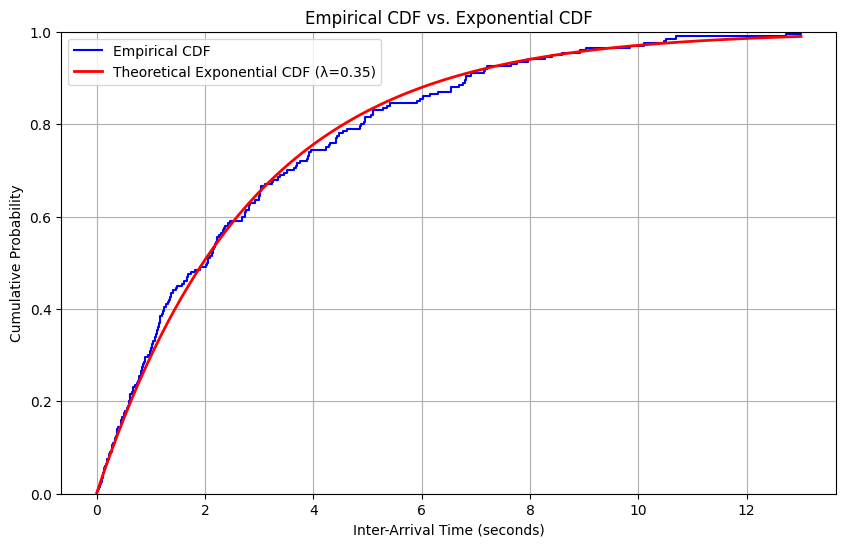

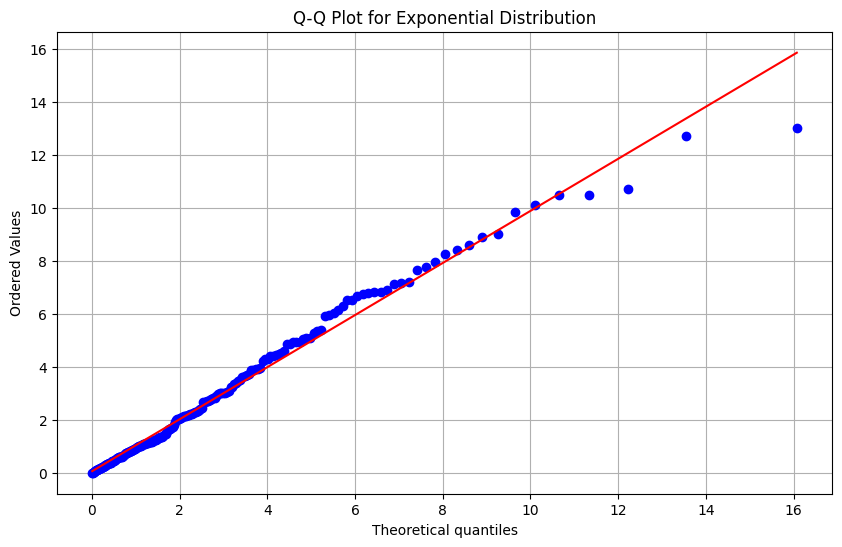


Conclusion:
- The inter-arrival times were well-modeled by an exponential distribution.
- Traffic light duration can be optimized using vehicle arrival rates.
- Probabilities of queue build-up can help refine traffic signal timings for peak hours.


In [ ]:


# Run CDF and Q-Q plot
plot_cdf_qq(inter_arrival_times)

# 7. Conclusion
def conclude():
    print("\nConclusion:")
    print("- The inter-arrival times were well-modeled by an exponential distribution.")
    print("- Traffic light duration can be optimized using vehicle arrival rates.")
    print("- Probabilities of queue build-up can help refine traffic signal timings for peak hours.")

conclude()